In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Sample size
N = 40
h = 6
MC = 10000
# Probabilities
probs = np.random.uniform(low=0, high=1, size=N)
probs = np.tile(probs, (MC, h, 1))
# Rate
rate = np.random.normal(loc=100.0, scale=50.0, size=N)
rate = np.tile(rate, (MC, h, 1))
# Effort
effort = np.random.lognormal(mean=5.0, sigma=1.0, size=(h, N))
effort = np.tile(effort, (MC, 1, 1))
# Available
avail = np.tile([20], (MC, h, N))

In [3]:
exp_rev = np.sum(np.mean(probs * rate * avail * effort, axis=0), axis=1)

In [4]:
rev = rate * avail * effort

In [5]:
suc_fail = np.random.uniform(low=0, high=1, size=MC * N)
suc_fail = np.tile(np.reshape(suc_fail, (MC, 1, N)), (1, h, 1))

In [6]:
sim = (suc_fail < probs ) * rev
res_50 = np.quantile(np.sum(sim, axis=2), 0.5, 0)
res_10 = np.quantile(np.sum(sim, axis=2), 0.1, 0)

In [8]:
np.mean(abs(exp_rev - res_50)/exp_rev)

0.018617590425284405

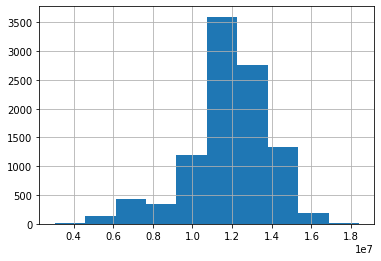

In [10]:
# First month 'revenue' distribution
pd.Series(np.sum(sim, axis=2)[:,1]).hist()